In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [2]:
num_testsub = 32
num_classes = 4
num_channel = 40
num_datapoints = 8064
num_trials = 40
sampling_rate = 128 # 128Hz as given in the data

def loadfiles_normalized():
    data_dict = {}
    print("Loading files into data_dict .................")
    for i in range(num_testsub):
                    if i < 10:
                        name = '%0*d' % (2,i+1)
                    else:
                        name = i+1
                    fname = 'data/data_prepared/data_norm_bhat/noramlized_datasub'+str(name) +'.npy'
                    data_dict["sub%s" %name] = np.load(fname)    
    print("Loaded!!!!!") 
    return data_dict

In [3]:
data_dict = loadfiles_normalized()

Loading files into data_dict .................
Loaded!!!!!


In [4]:
data = np.zeros((0,40,99))
data[:] = np.nan

for sub in data_dict.keys():
        data = np.concatenate((data, data_dict[sub]), axis=0)

In [5]:
data.shape

(1280, 40, 99)

In [6]:
ch1 = data[:,0,:]

In [20]:
# get features
list_of_features = []  
for i in range(99):
    featureX = np.zeros((1280,40))
    featureX[:] = np.nan
    for j in range(40):
        temp = data[:,j,i]
        featureX[:,j] = temp
    list_of_features.append(featureX)

In [13]:
np.isnan(feature1).any()

False

In [11]:
ch1.shape

(1280, 99)

<AxesSubplot: ylabel='Count'>

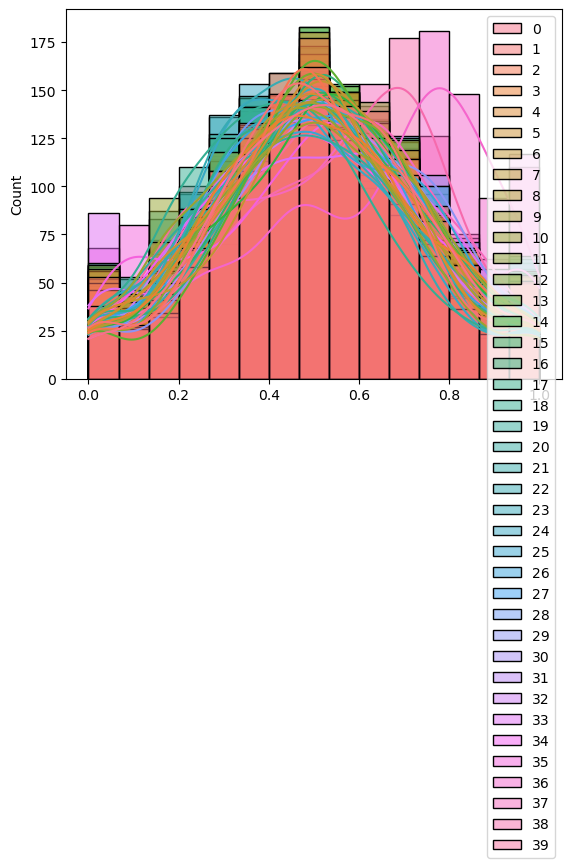

In [21]:
sns.histplot(list_of_features[0], kde=True, bins=15)

<AxesSubplot: ylabel='Count'>

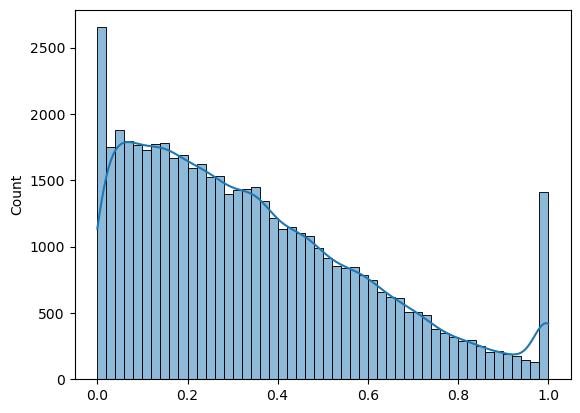

In [37]:
sns.histplot(list_of_features[2].flatten(), kde=True, bins=50)

## Generated Data

### 02

In [26]:
arrays = []
for i in range(10):
    arrays.append(torch.load("data/sampled/02/sampled_40-104_43_"+str(i)))
generated_data = np.concatenate(arrays, axis=0)

In [27]:
X_argument2 = np.zeros((1280,40,99))
X_argument2[:] = np.nan
counter = 0
for i in range(430):
    for j in range(3):
        if counter == 1280:
            break
        else:
            X_argument2[counter] = generated_data[i][j][:,:99]
            counter = counter +1

In [29]:
X_argument2.shape

(1280, 40, 99)

In [32]:
# get features
list_of_features_fake = []  
for i in range(99):
    featureX = np.zeros((1280,40))
    featureX[:] = np.nan
    for j in range(40):
        temp = X_argument2[:,j,i]
        featureX[:,j] = temp
    list_of_features_fake.append(featureX)

<AxesSubplot: ylabel='Count'>

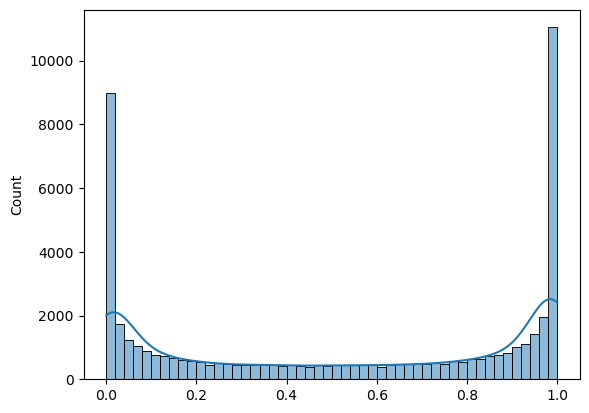

In [38]:
sns.histplot(list_of_features_fake[2].flatten(), kde=True, bins=50)

<AxesSubplot: ylabel='Count'>

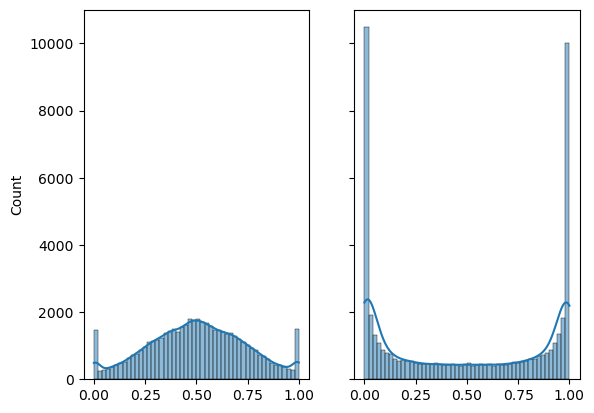

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.histplot(list_of_features[0].flatten(), kde=True, bins=50, ax=ax1)
sns.histplot(list_of_features_fake[0].flatten(), kde=True, bins=50, ax=ax2)

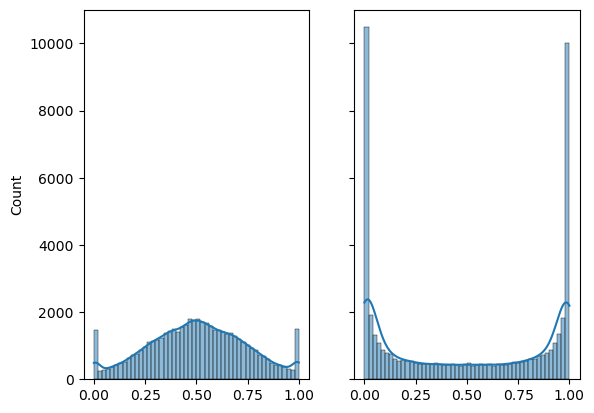

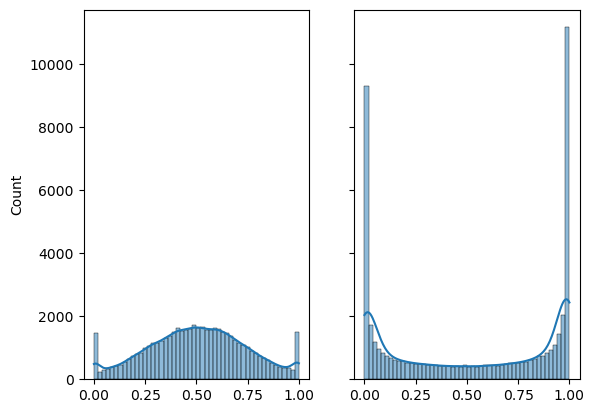

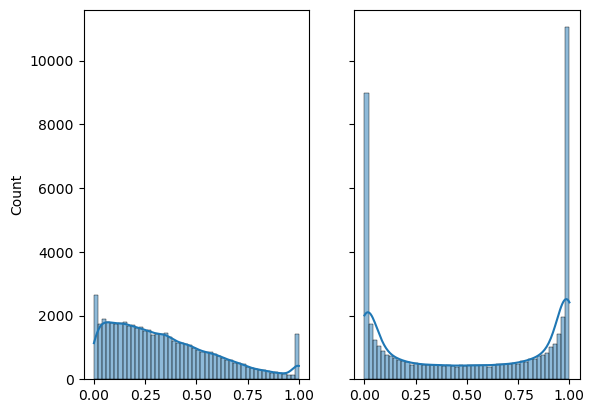

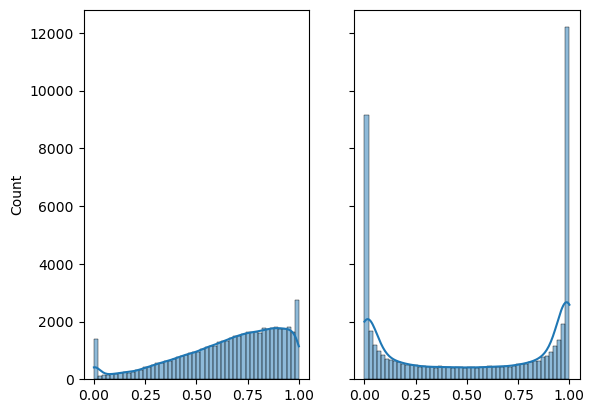

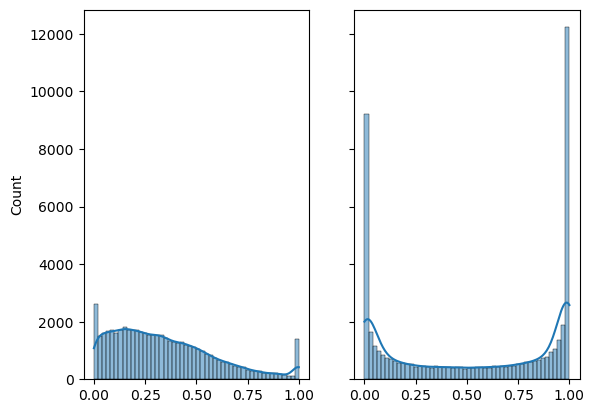

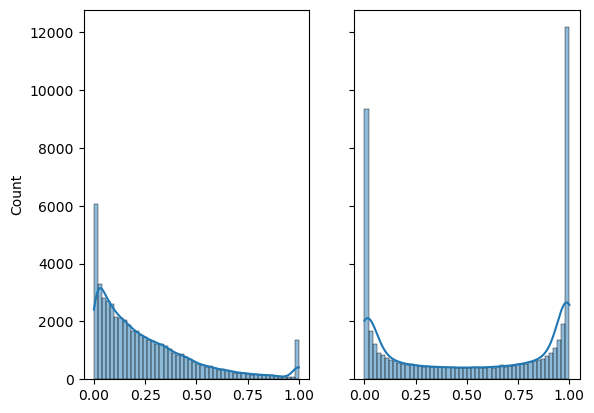

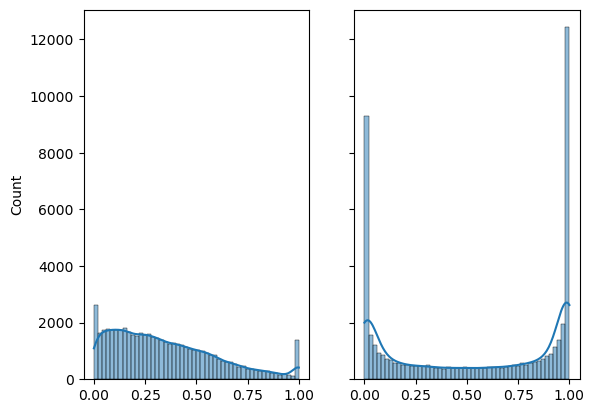

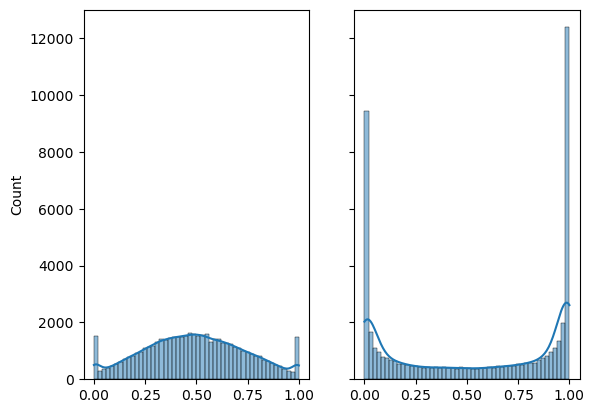

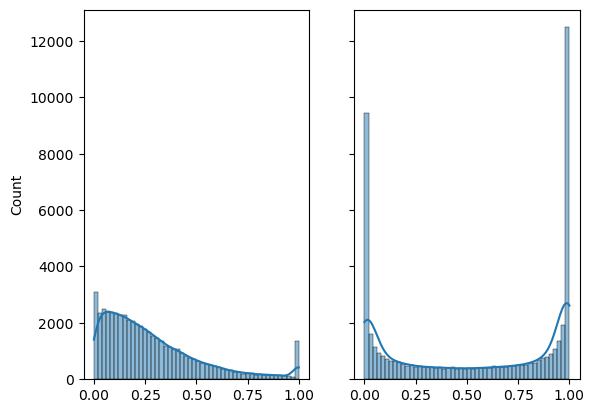

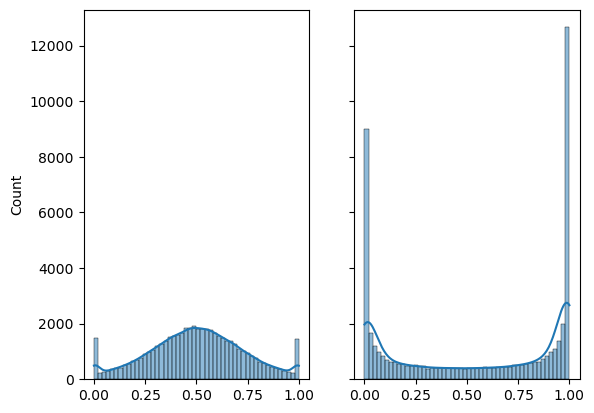

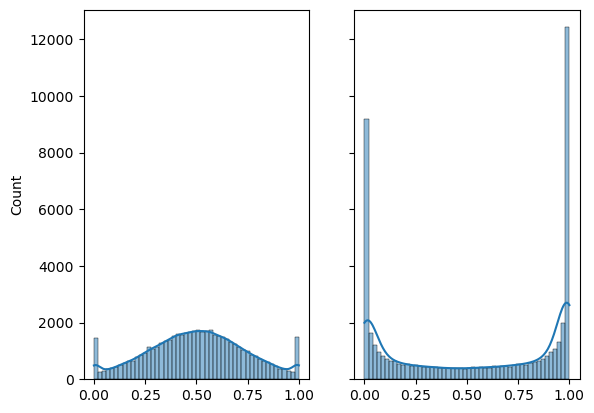

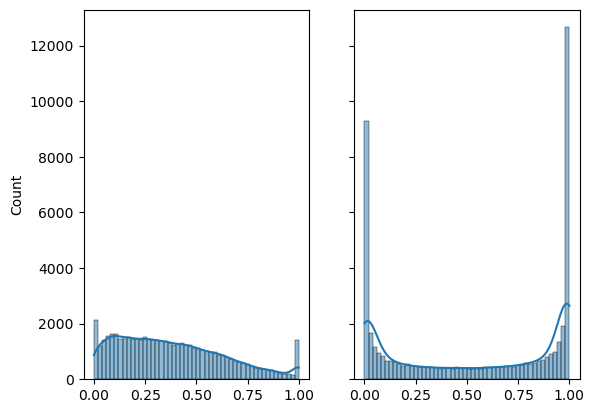

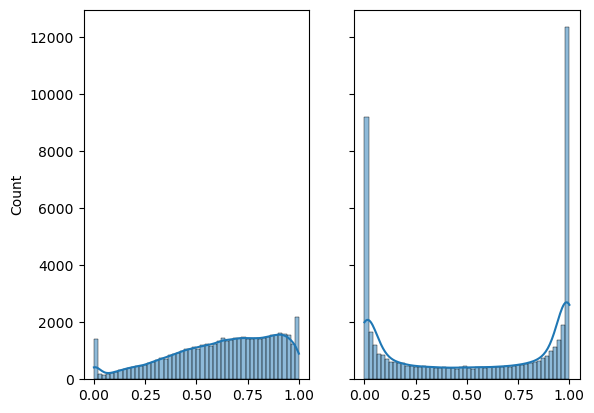

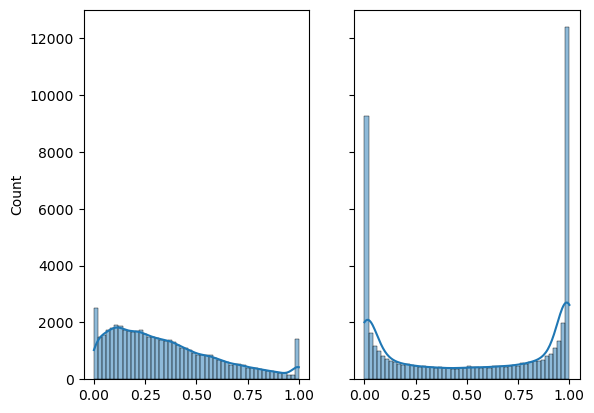

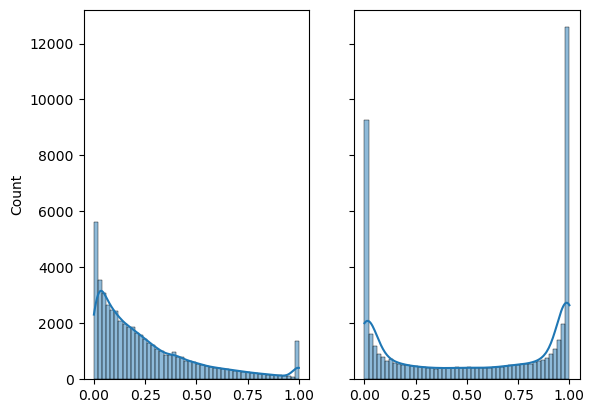

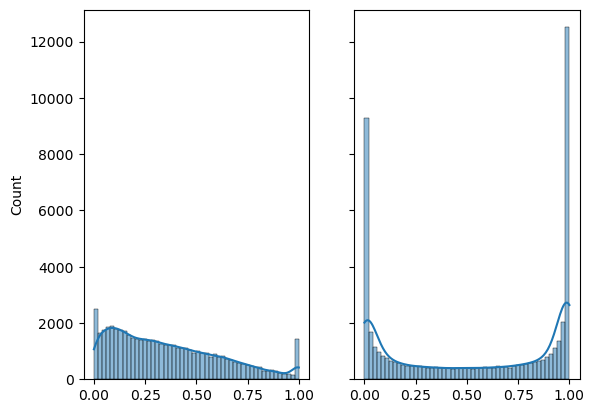

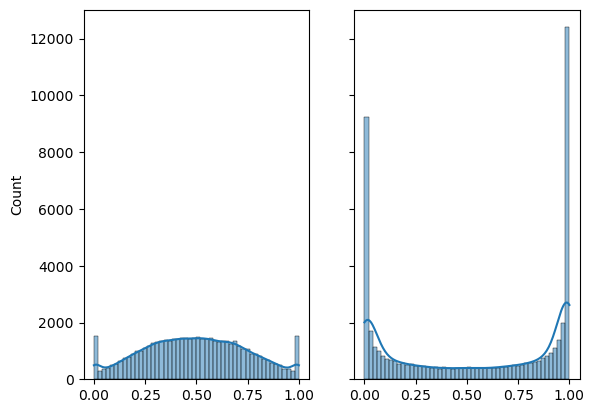

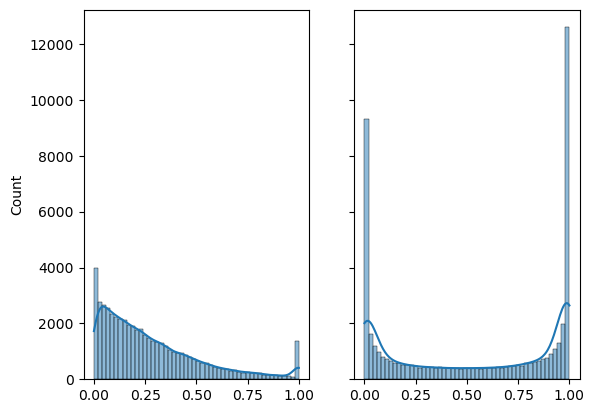

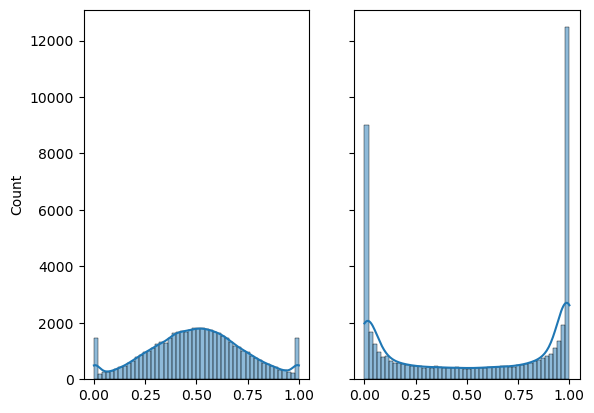

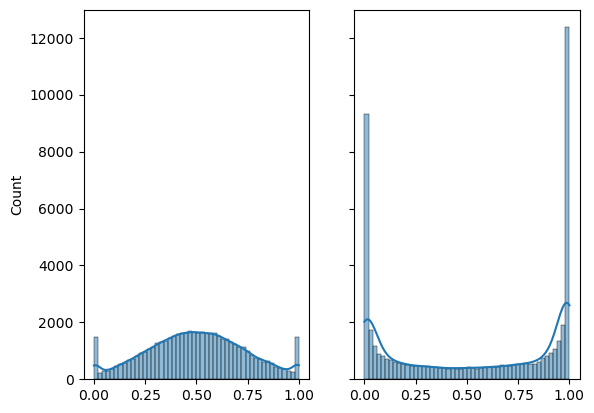

In [44]:
for i in range(20):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    sns.histplot(list_of_features[i].flatten(), kde=True, bins=50, ax=ax1)
    sns.histplot(list_of_features_fake[i].flatten(), kde=True, bins=50, ax=ax2)

In [48]:
list_of_features_fake[2]

array([[2.68959761e-01, 8.65848422e-01, 8.66240621e-01, ...,
        7.75216699e-01, 1.00000000e+00, 4.88024116e-01],
       [3.31781805e-01, 2.00642735e-01, 4.89360094e-03, ...,
        0.00000000e+00, 3.89884531e-01, 7.59760618e-01],
       [9.91478562e-01, 1.53979808e-01, 4.02269065e-02, ...,
        3.90115380e-01, 5.29080629e-01, 4.47322160e-01],
       ...,
       [7.82846808e-01, 1.00000000e+00, 1.21734440e-01, ...,
        6.08994544e-01, 0.00000000e+00, 8.75513673e-01],
       [9.95653272e-01, 2.57617474e-01, 8.79238427e-01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.42369676e-02, 8.44916880e-01, 9.09417868e-04, ...,
        9.11674142e-01, 0.00000000e+00, 1.00000000e+00]])

### Generated Data (2nd)

### 01

In [49]:
new_data = torch.load("data/sampled/01/psd_427")

In [55]:
new_data.shape

torch.Size([427, 3, 40, 104])

In [53]:
X_argument = np.zeros((1280,40,99))
X_argument[:] = np.nan
counter = 0
for i in range(427):
    for j in range(3):
        if counter == 1280:
            break
        else:
            X_argument[counter] = new_data[i][j][:,:99]
            counter = counter +1

In [54]:
X_argument.shape

(1280, 40, 99)

In [56]:
# get features
list_of_features_fake2 = []  
for i in range(99):
    featureX = np.zeros((1280,40))
    featureX[:] = np.nan
    for j in range(40):
        temp = X_argument[:,j,i]
        featureX[:,j] = temp
    list_of_features_fake2.append(featureX)

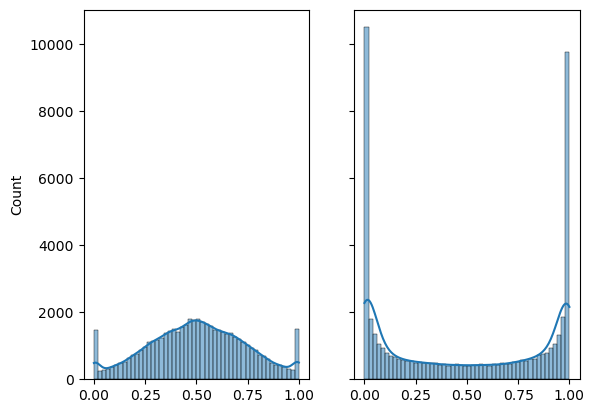

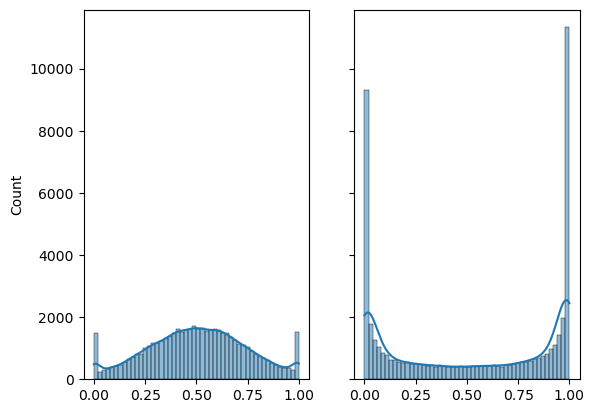

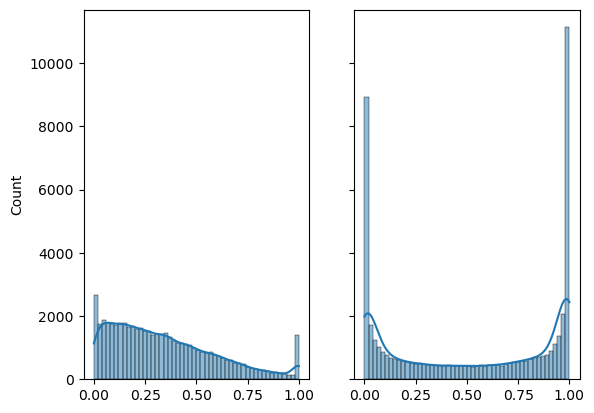

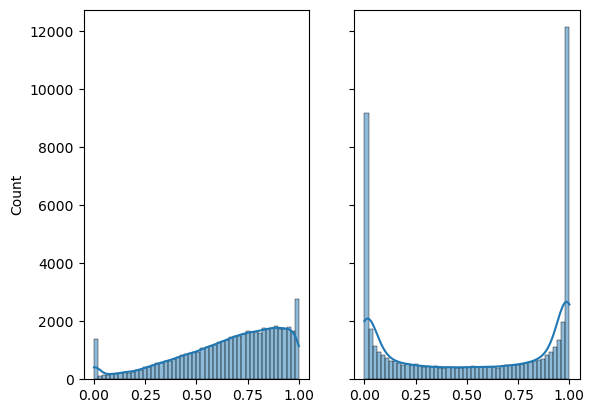

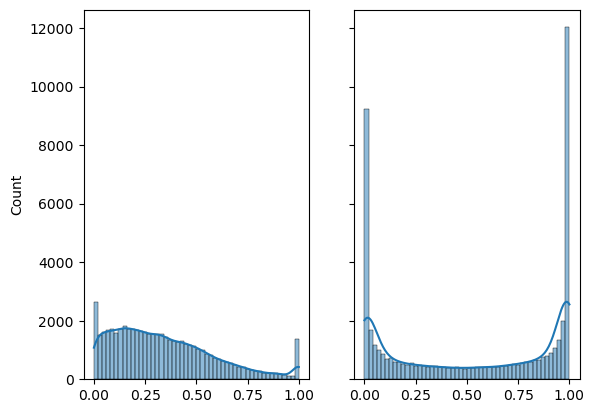

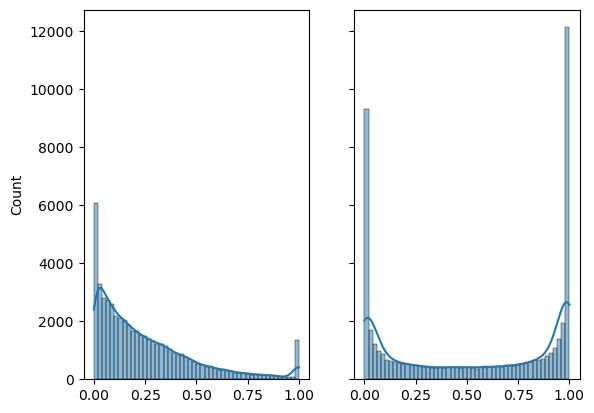

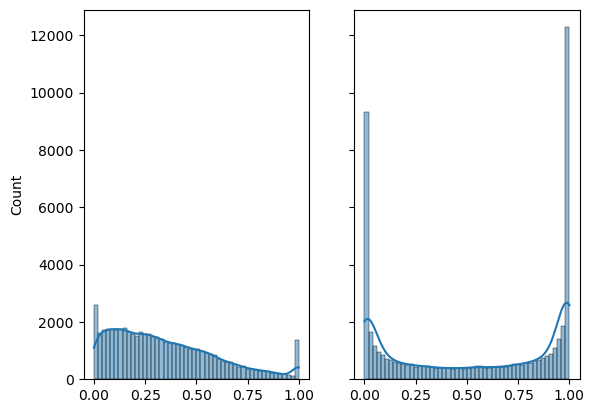

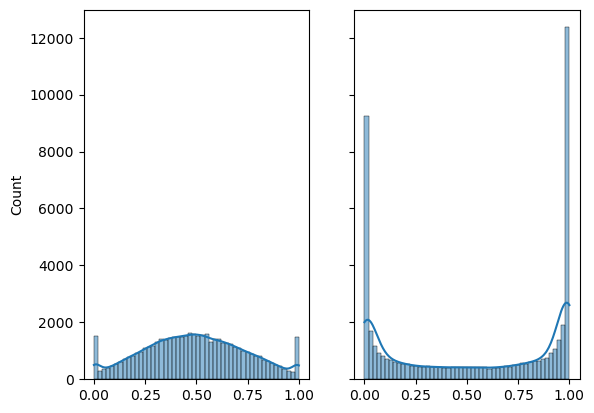

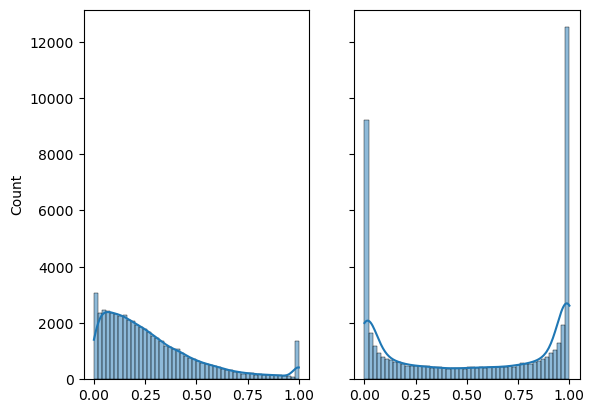

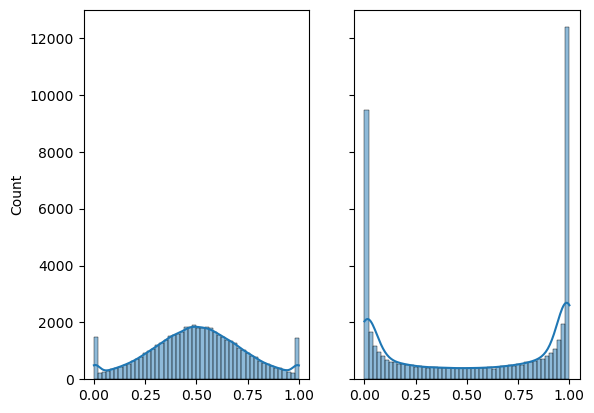

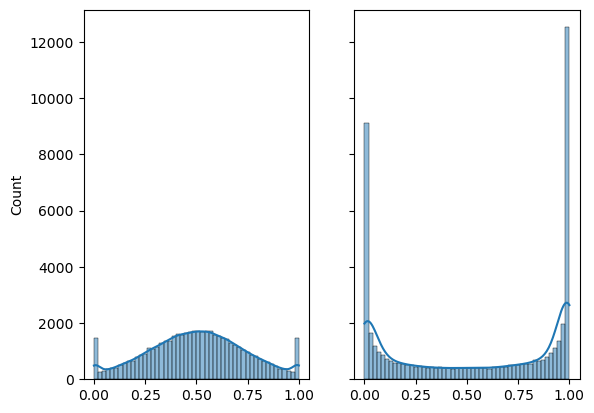

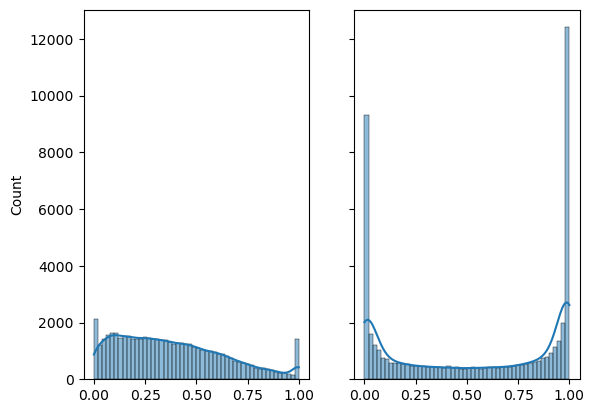

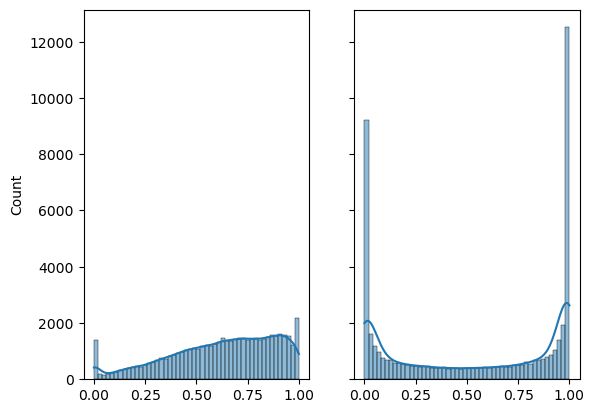

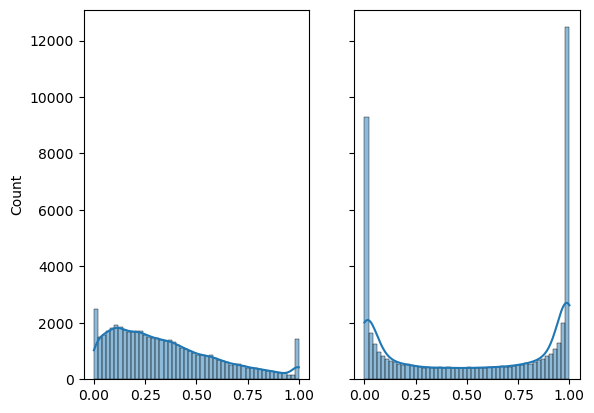

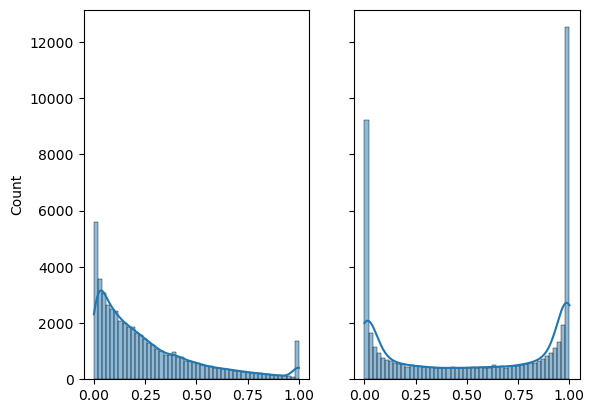

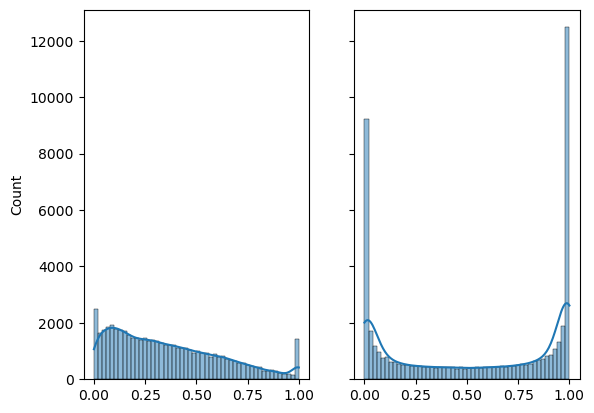

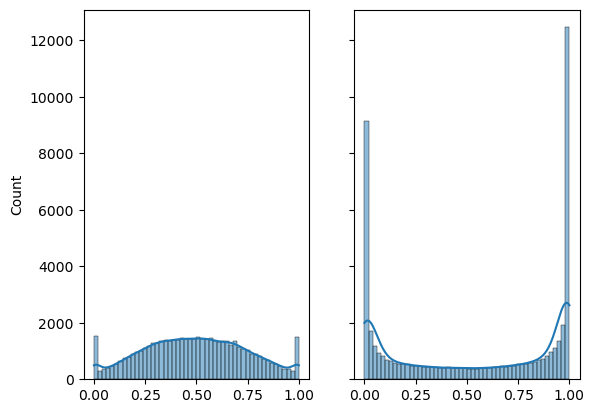

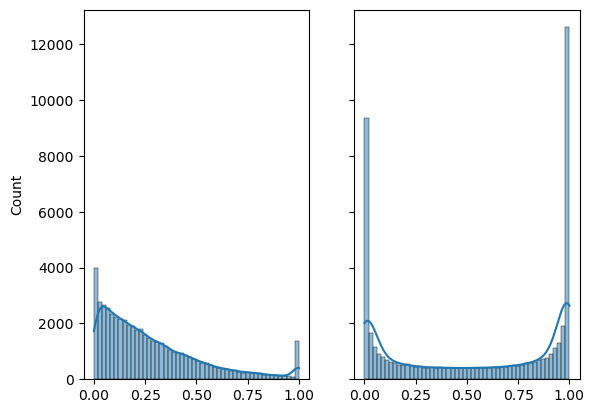

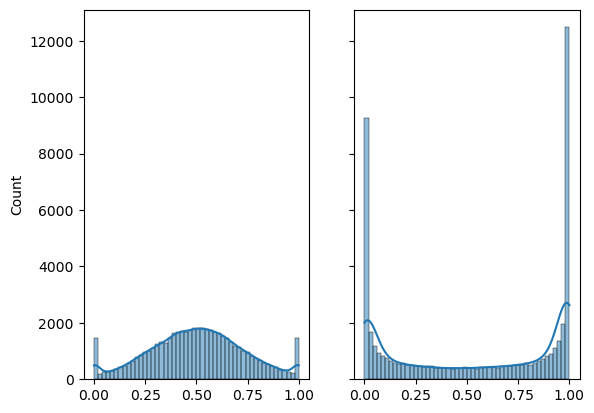

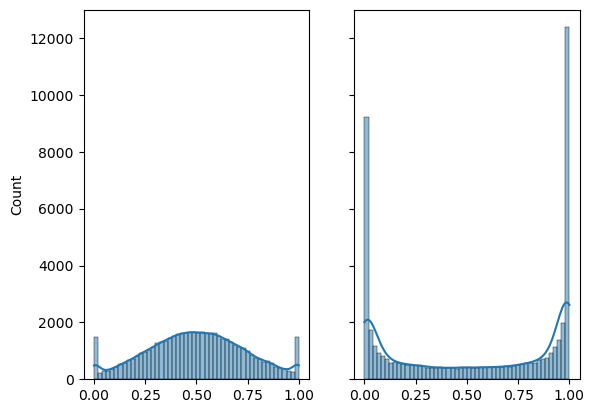

In [57]:
for i in range(20):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    sns.histplot(list_of_features[i].flatten(), kde=True, bins=50, ax=ax1)
    sns.histplot(list_of_features_fake2[i].flatten(), kde=True, bins=50, ax=ax2)

### This time with training before

### 03

In [58]:
trained = torch.load("data/sampled/03/sampledT400_43_0")

In [63]:
trained.shape

torch.Size([43, 3, 40, 104])

In [59]:
X_argument = np.zeros((129,40,99))
X_argument[:] = np.nan
counter = 0
for i in range(427):
    for j in range(3):
        if counter == 129:
            break
        else:
            X_argument[counter] = new_data[i][j][:,:99]
            counter = counter +1

In [61]:
# get features
list_of_features_fake_train = []  
for i in range(99):
    featureX = np.zeros((129,40))
    featureX[:] = np.nan
    for j in range(40):
        temp = X_argument[:,j,i]
        featureX[:,j] = temp
    list_of_features_fake_train.append(featureX)

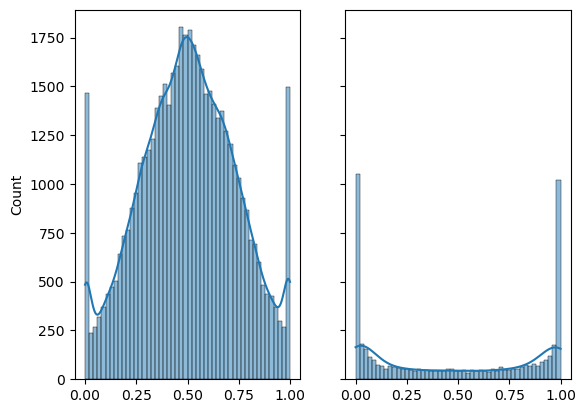

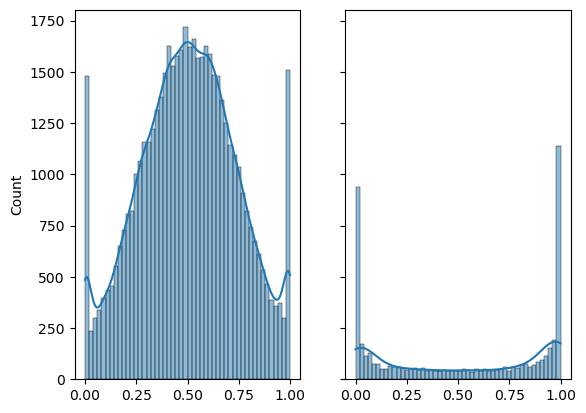

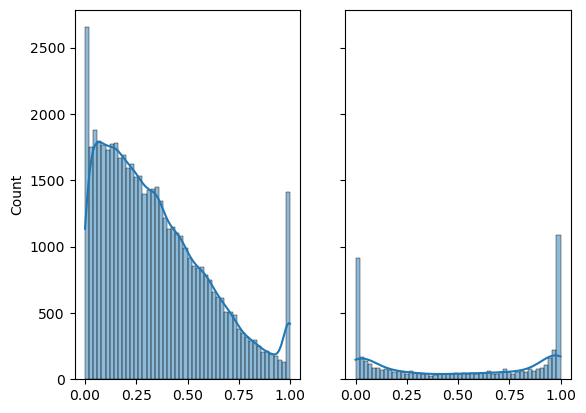

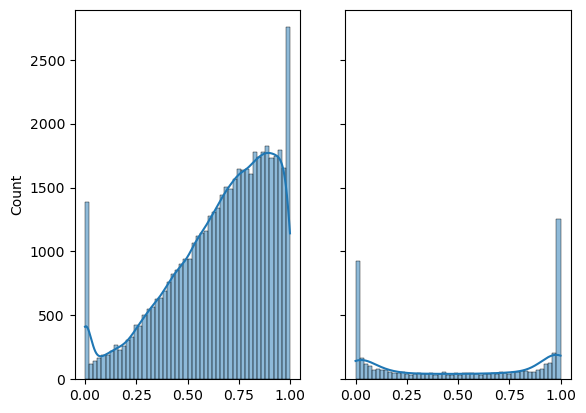

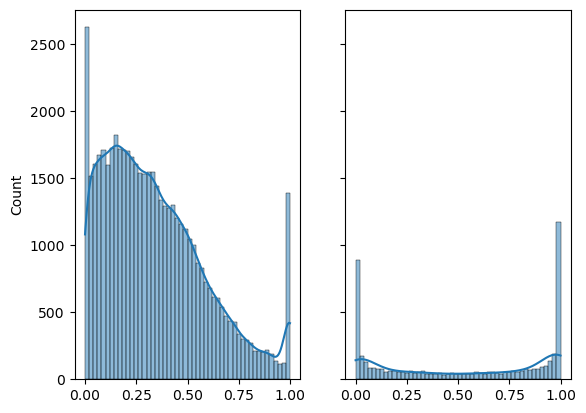

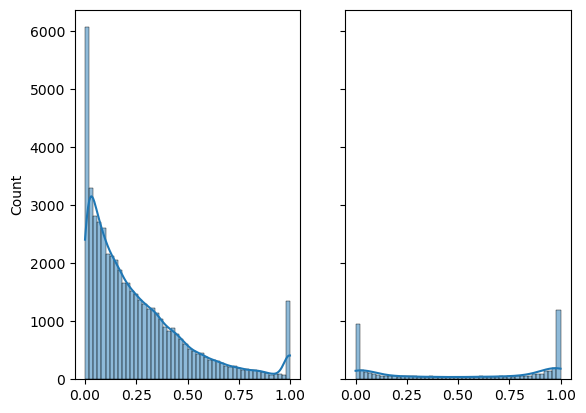

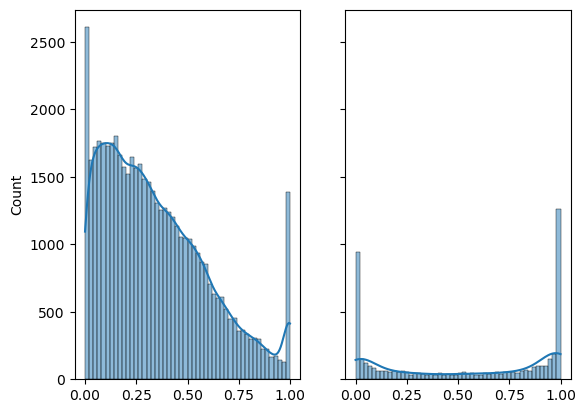

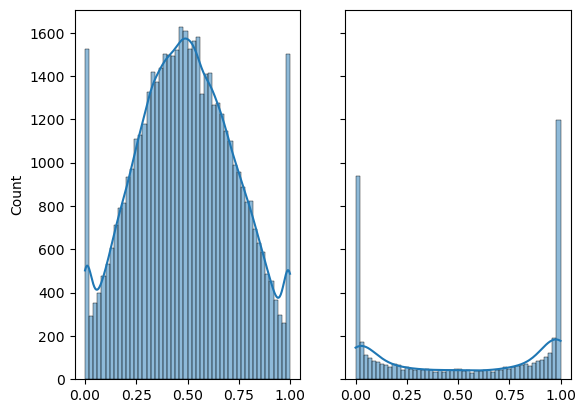

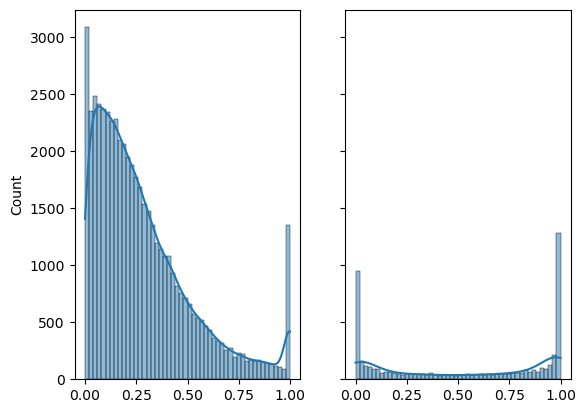

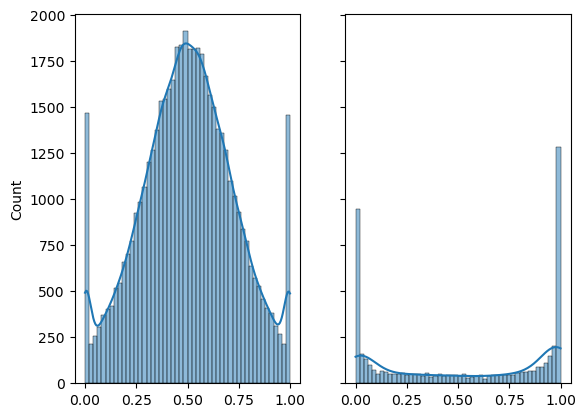

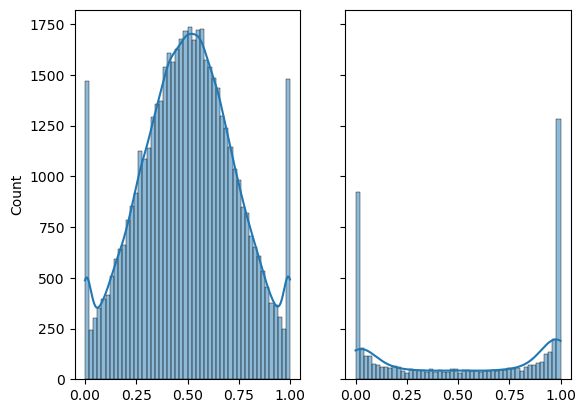

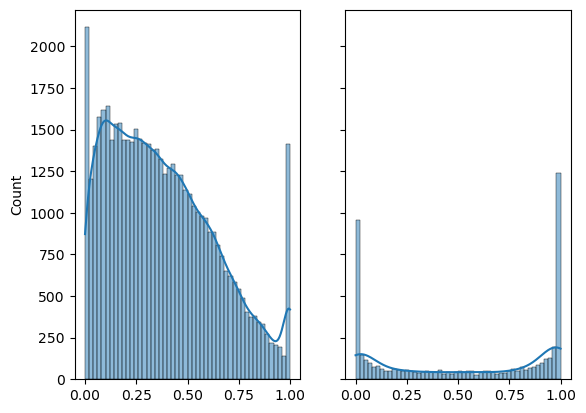

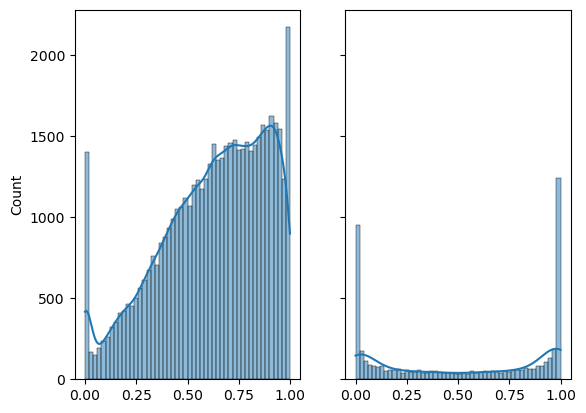

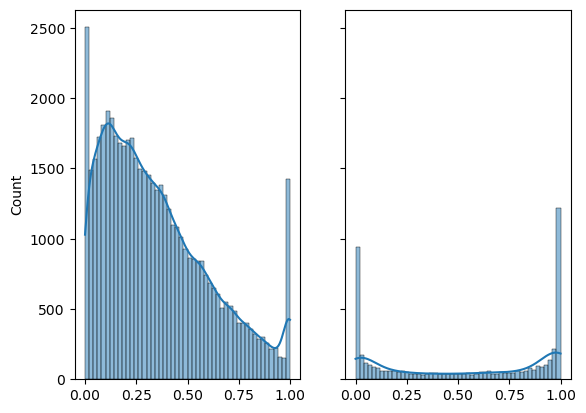

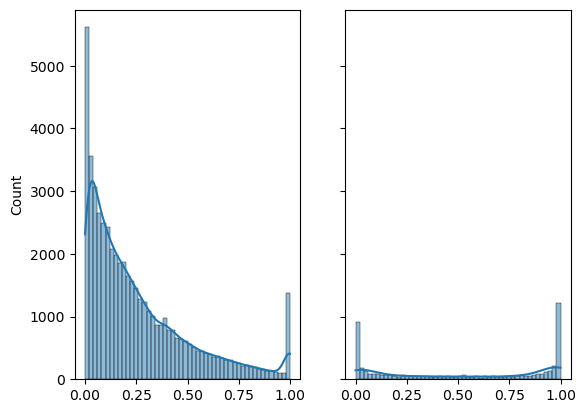

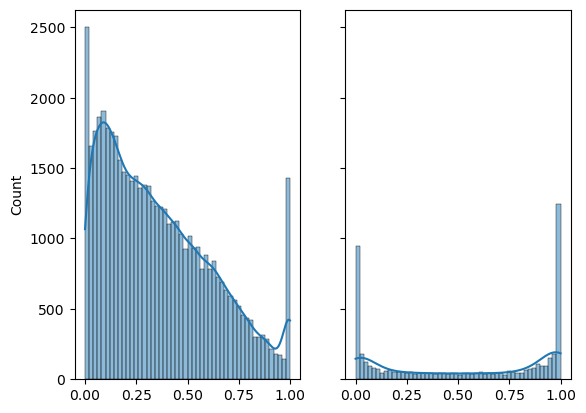

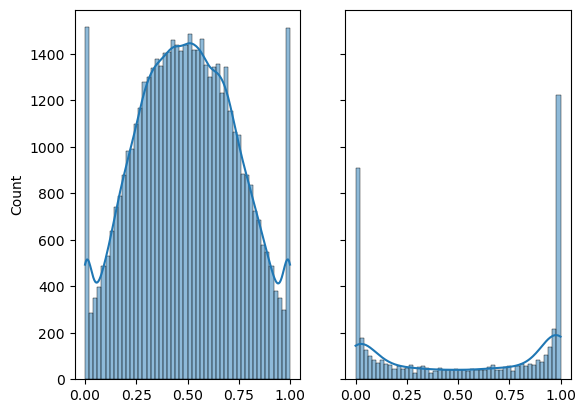

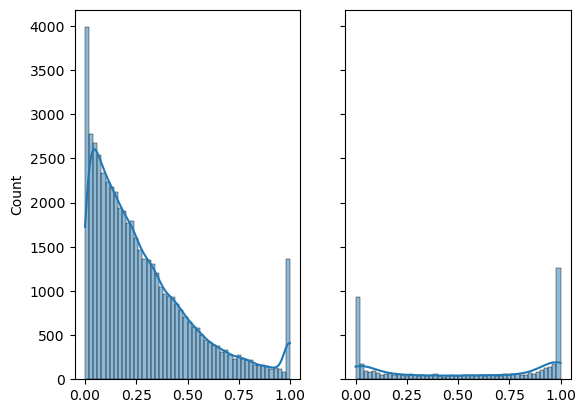

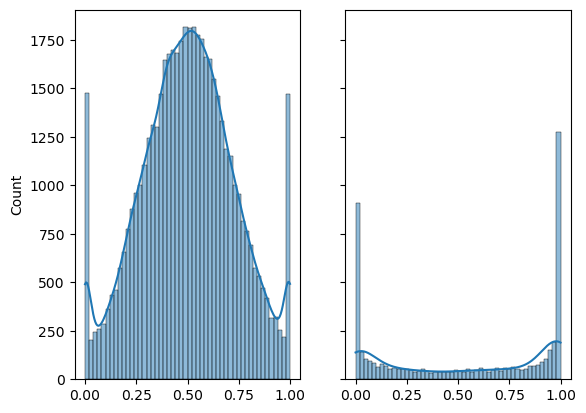

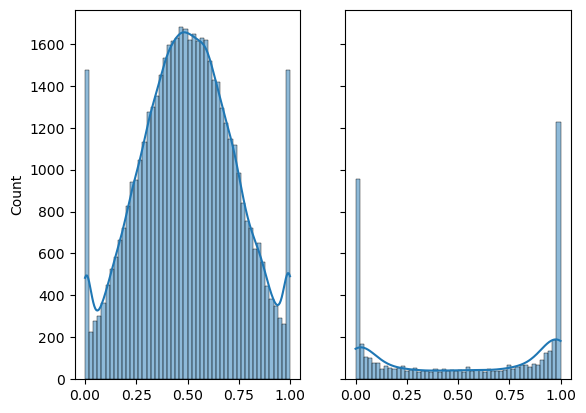

In [62]:
for i in range(20):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    sns.histplot(list_of_features[i].flatten(), kde=True, bins=50, ax=ax1)
    sns.histplot(list_of_features_fake_train[i].flatten(), kde=True, bins=50, ax=ax2)

## 1D Data

### 001

In [64]:
arrays = []
for i in range(10):
    arrays.append(torch.load("data/sampled/001/sampled1D_40-104_43_"+str(i)))
generated_data = np.concatenate(arrays, axis=0)

In [67]:
generated_data.shape

(1280, 1, 40, 104)

In [72]:
X_argument2 = np.zeros((1280,40,99))
X_argument2[:] = np.nan

for i in range(1280):
        X_argument2[i] = generated_data[i][0][:,:99]        

In [79]:
X_argument2.shape

(1280, 40, 99)

In [81]:
# get features
list_of_features_fake_train_1d = []  
for i in range(99):
    featureX = np.zeros((1280,40))
    featureX[:] = np.nan
    for j in range(40):
        temp = X_argument2[:,j,i]
        featureX[:,j] = temp
    list_of_features_fake_train_1d.append(featureX)

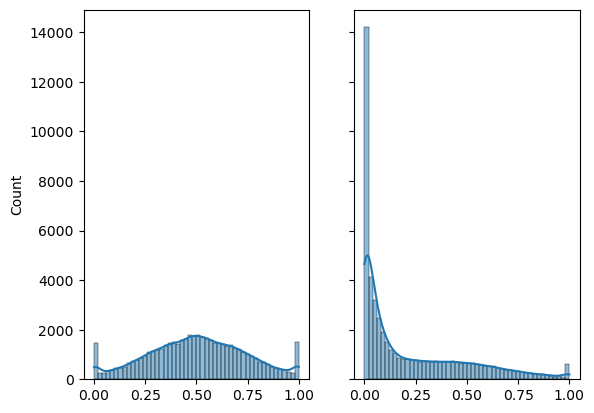

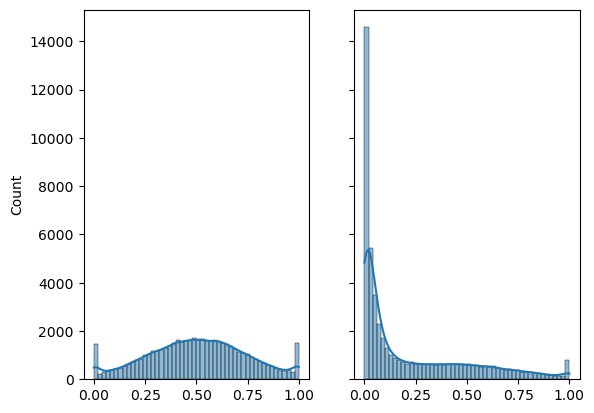

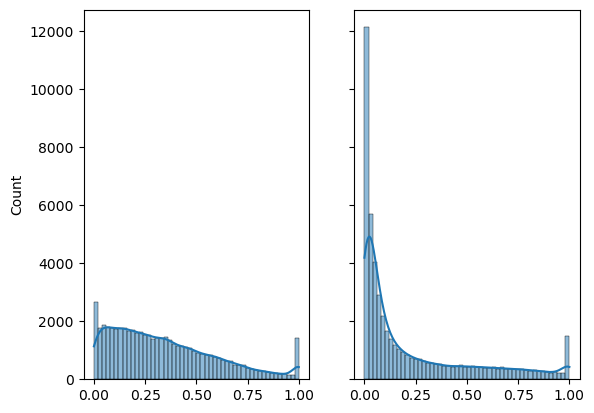

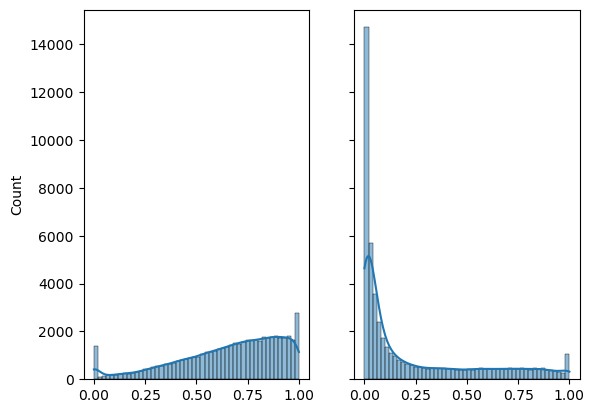

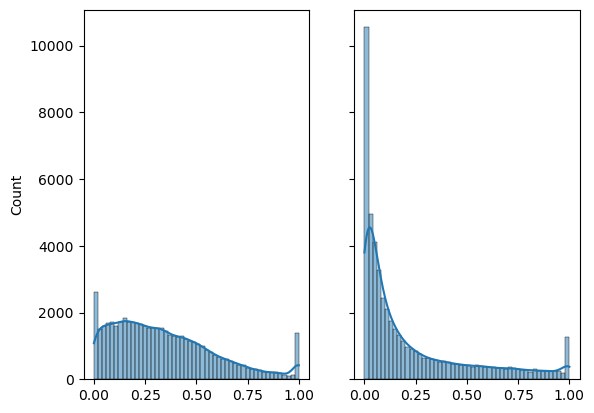

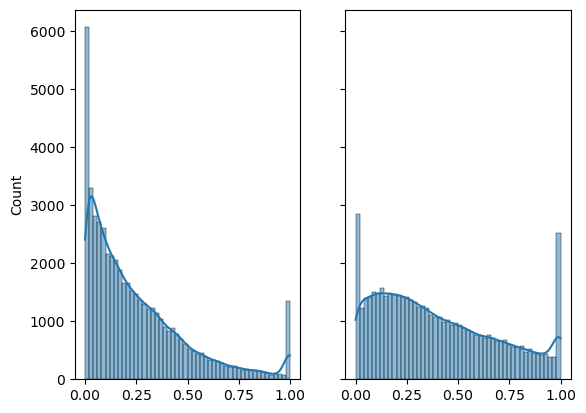

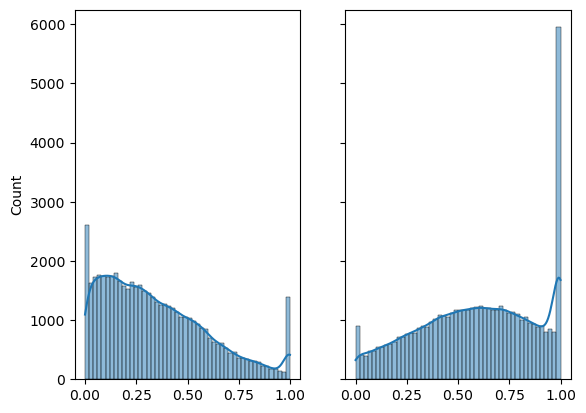

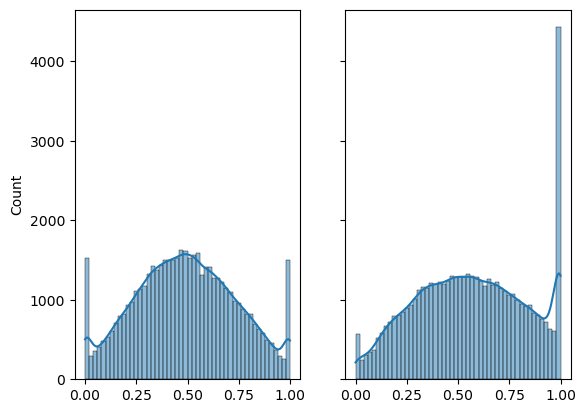

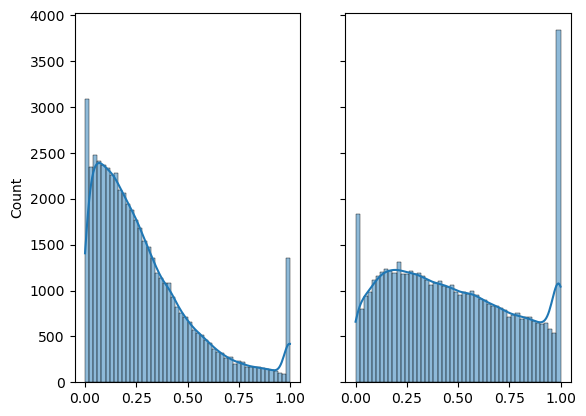

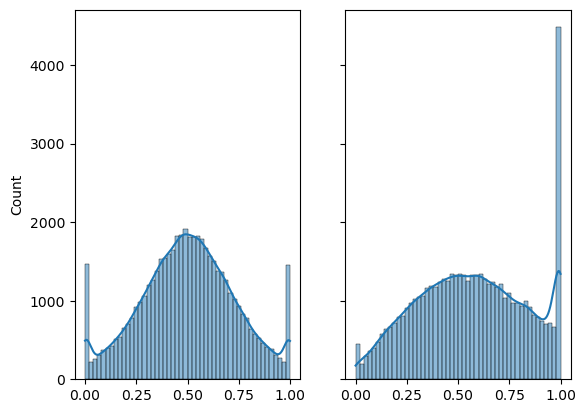

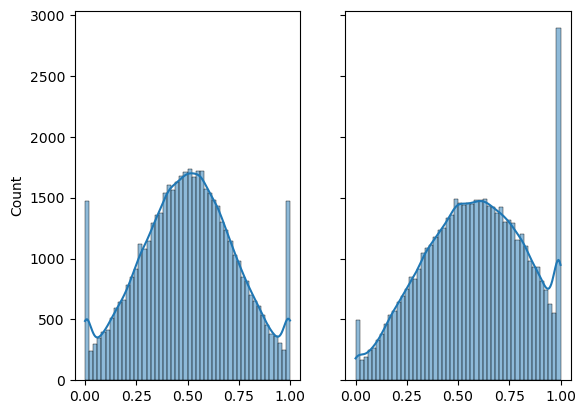

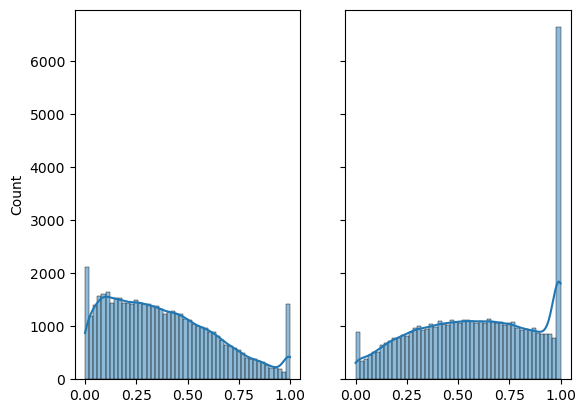

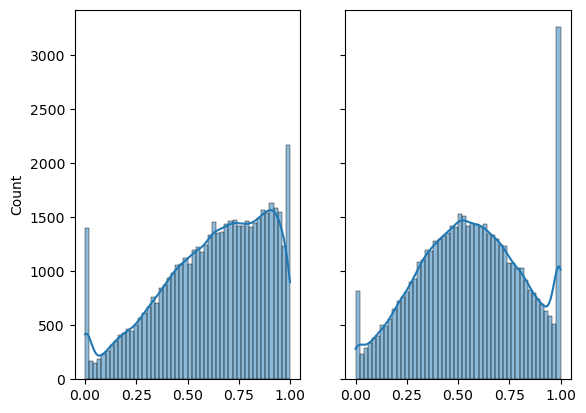

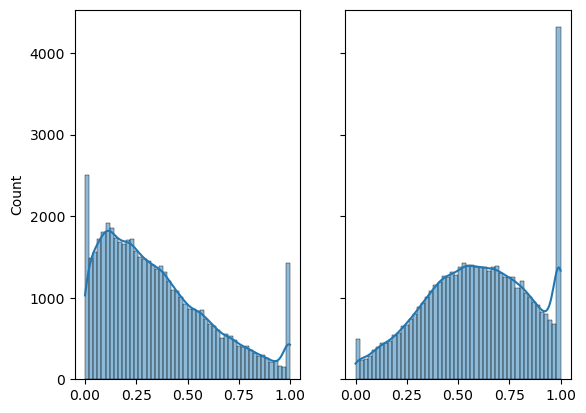

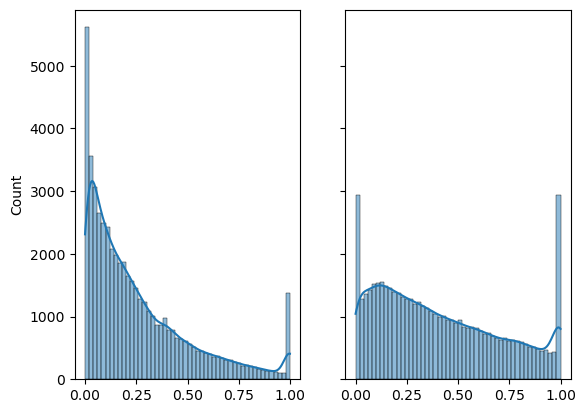

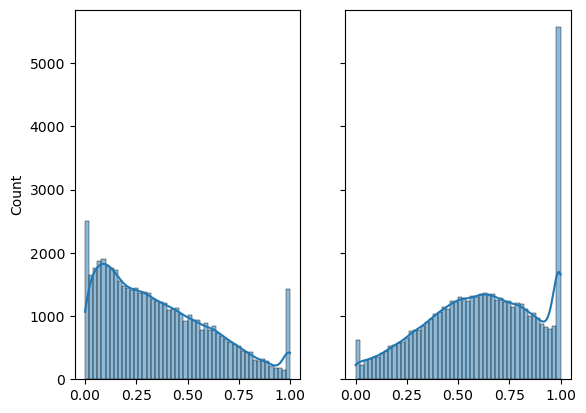

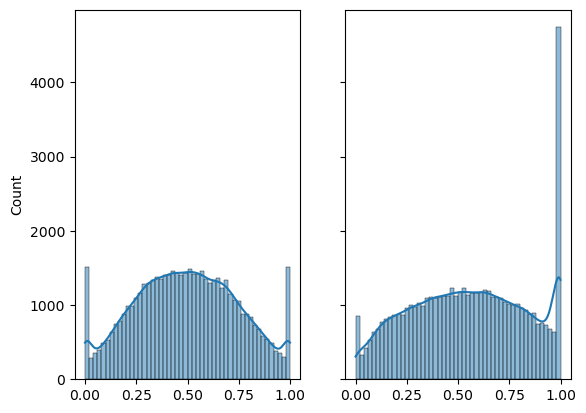

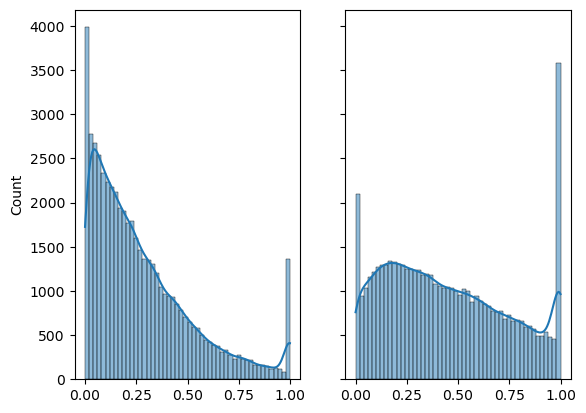

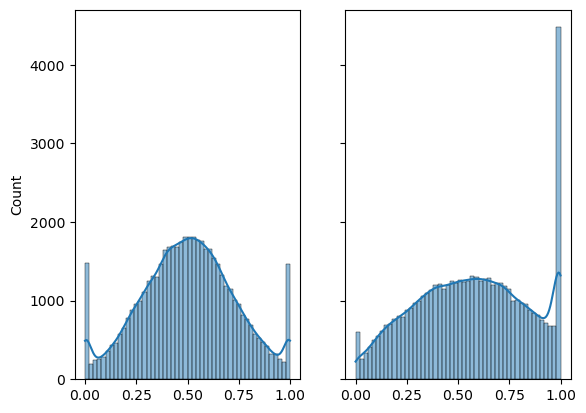

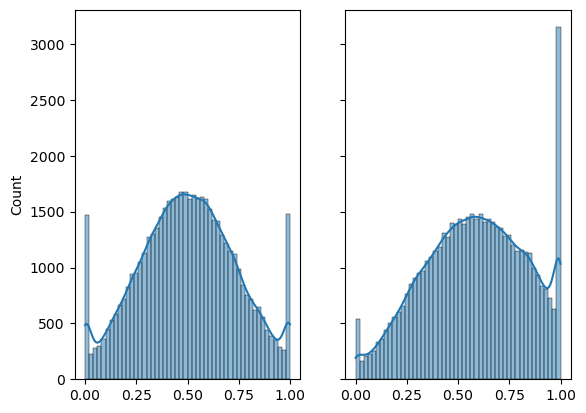

In [82]:
for i in range(20):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    sns.histplot(list_of_features[i].flatten(), kde=True, bins=50, ax=ax1)
    sns.histplot(list_of_features_fake_train_1d[i].flatten(), kde=True, bins=50, ax=ax2)

### 002

In [83]:
arrays = []
for i in range(10):
    arrays.append(torch.load("data/sampled/002/sampled1D_1500_128_"+str(i)))
generated_data = np.concatenate(arrays, axis=0)

In [84]:
generated_data.shape

(1280, 1, 40, 104)

In [85]:
X_argument2 = np.zeros((1280,40,99))
X_argument2[:] = np.nan

for i in range(1280):
        X_argument2[i] = generated_data[i][0][:,:99]        

In [86]:
# get features
list_of_features_fake_train_1d = []  
for i in range(99):
    featureX = np.zeros((1280,40))
    featureX[:] = np.nan
    for j in range(40):
        temp = X_argument2[:,j,i]
        featureX[:,j] = temp
    list_of_features_fake_train_1d.append(featureX)

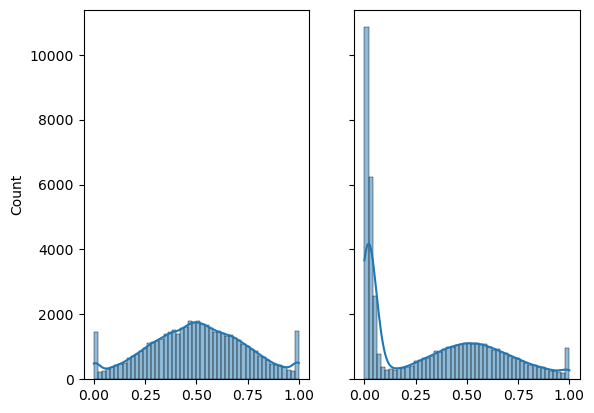

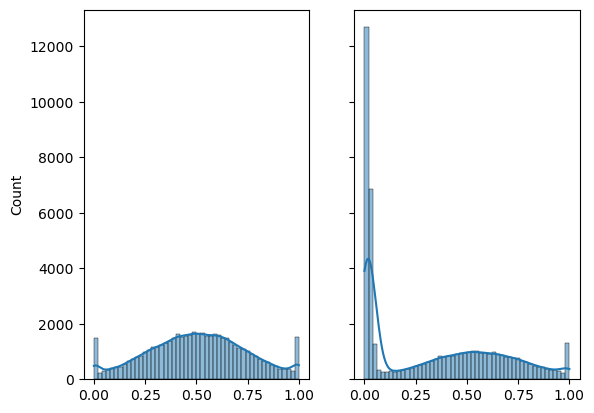

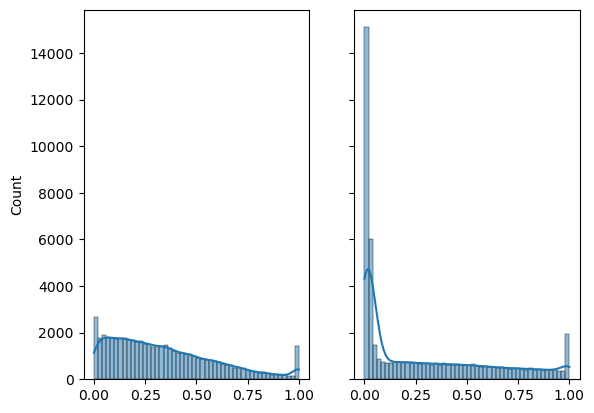

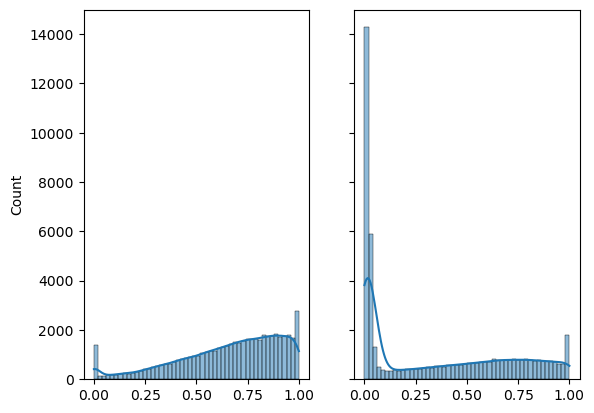

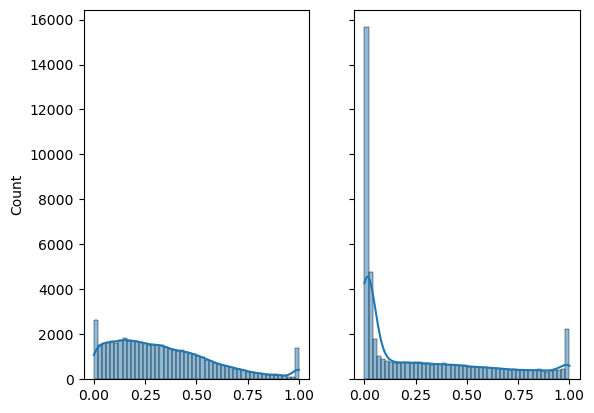

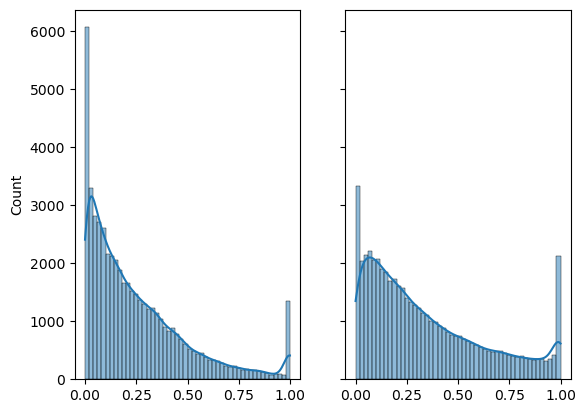

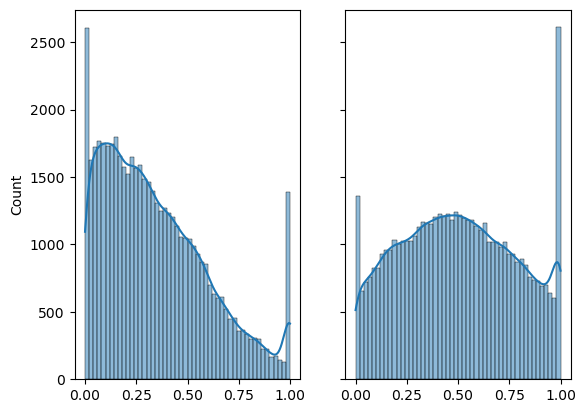

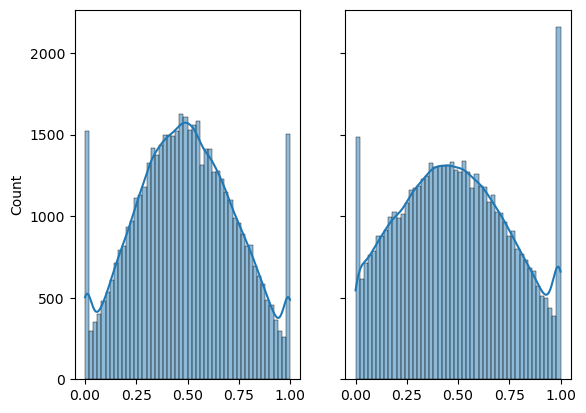

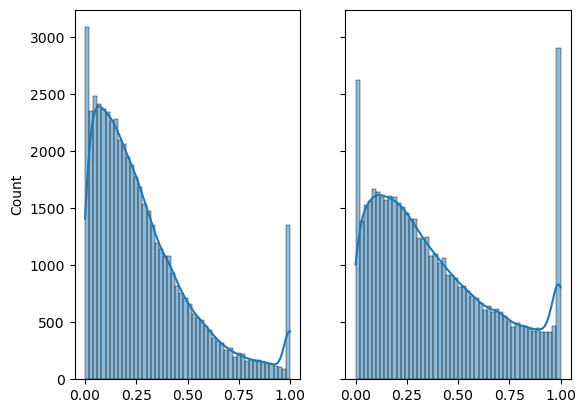

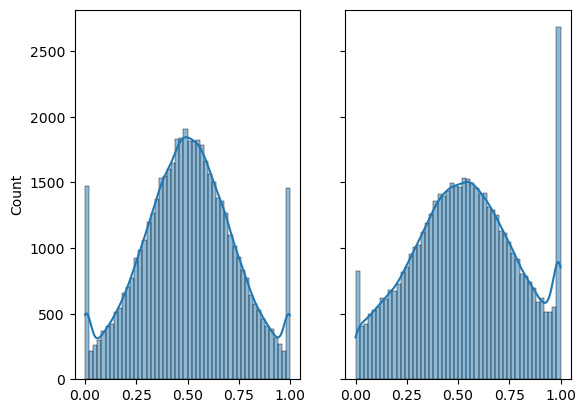

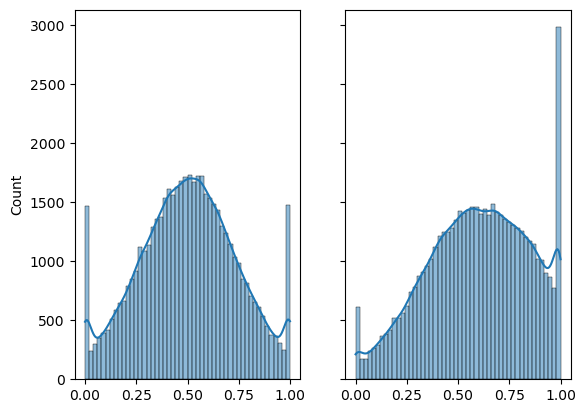

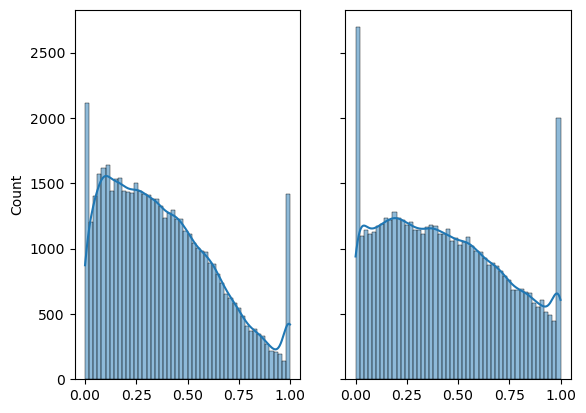

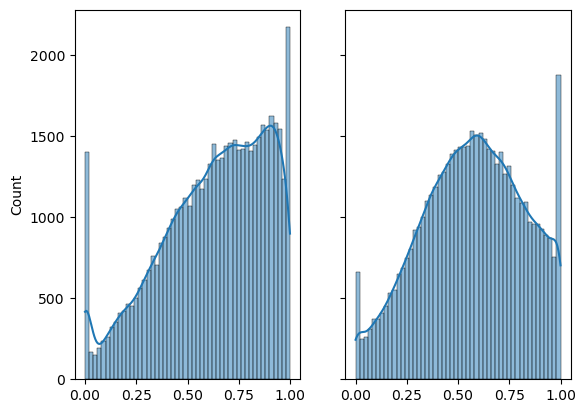

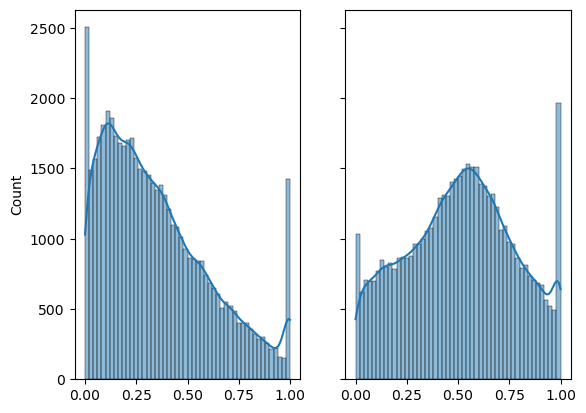

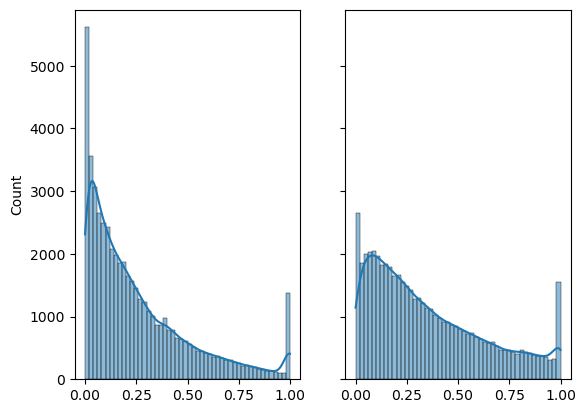

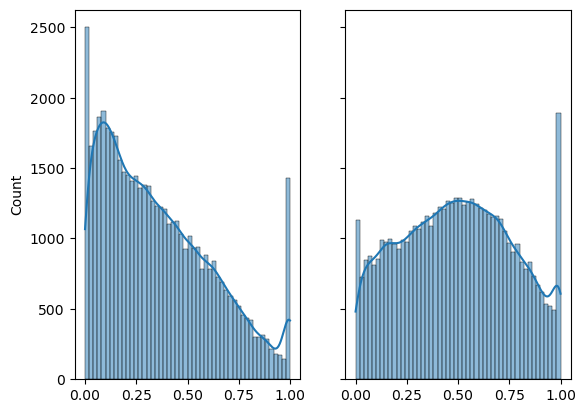

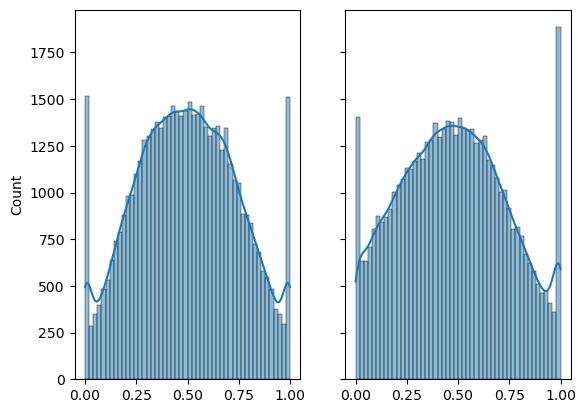

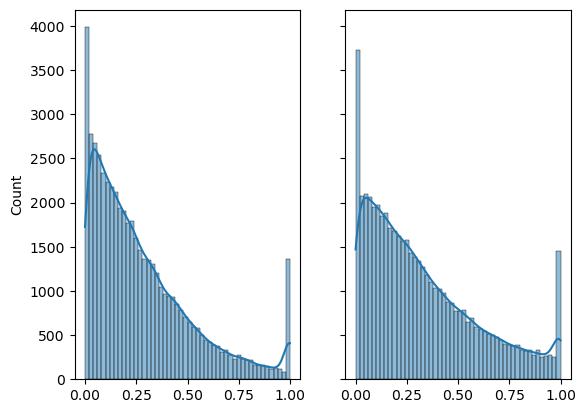

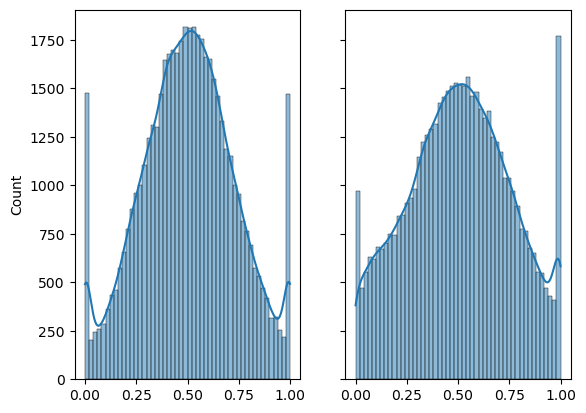

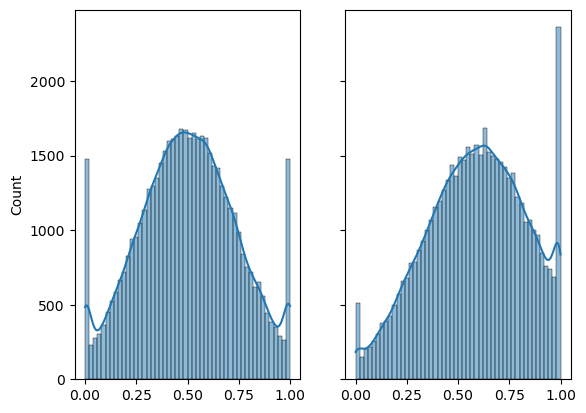

In [87]:
for i in range(20):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    sns.histplot(list_of_features[i].flatten(), kde=True, bins=50, ax=ax1)
    sns.histplot(list_of_features_fake_train_1d[i].flatten(), kde=True, bins=50, ax=ax2)

### 003

In [88]:
arrays = []
for i in range(10):
    arrays.append(torch.load("data/sampled/003/sampled1D_2000_128_"+str(i)))
generated_data = np.concatenate(arrays, axis=0)

In [89]:
generated_data.shape

(1280, 1, 40, 104)

In [90]:
X_argument2 = np.zeros((1280,40,99))
X_argument2[:] = np.nan

for i in range(1280):
        X_argument2[i] = generated_data[i][0][:,:99]        

In [91]:
# get features
list_of_features_fake_train_1d = []  
for i in range(99):
    featureX = np.zeros((1280,40))
    featureX[:] = np.nan
    for j in range(40):
        temp = X_argument2[:,j,i]
        featureX[:,j] = temp
    list_of_features_fake_train_1d.append(featureX)

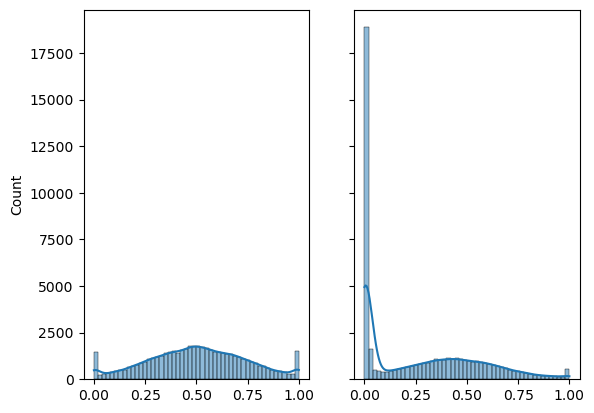

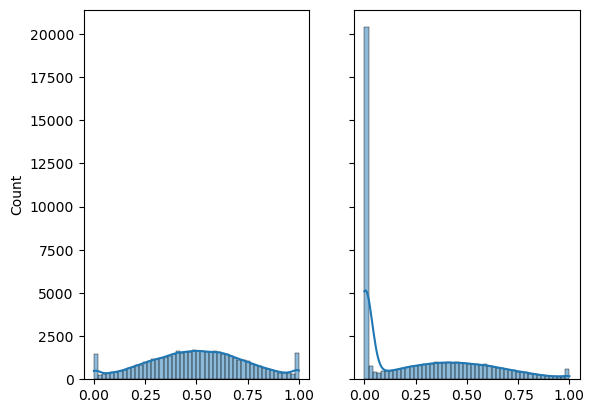

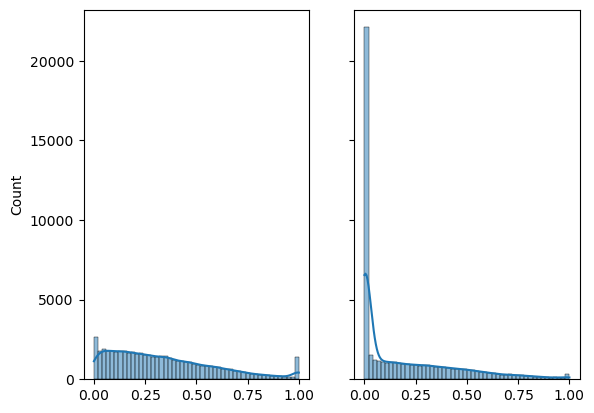

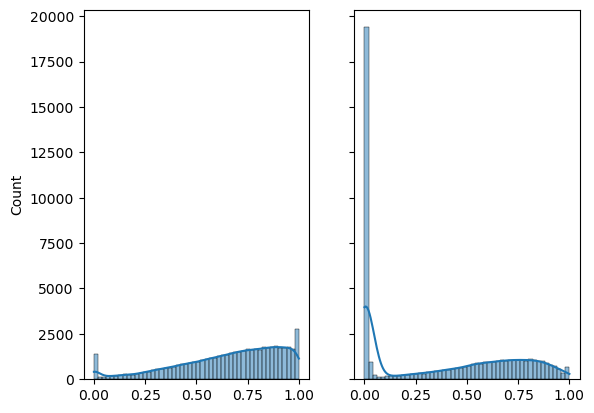

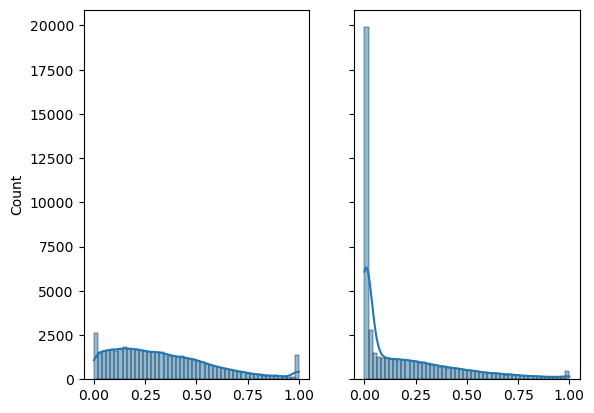

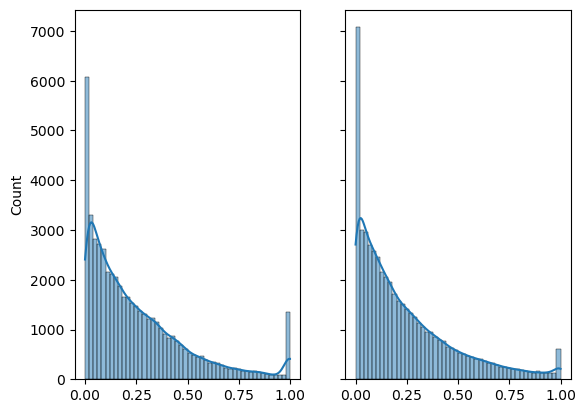

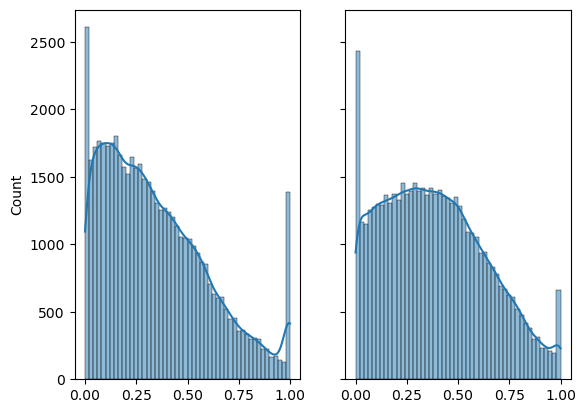

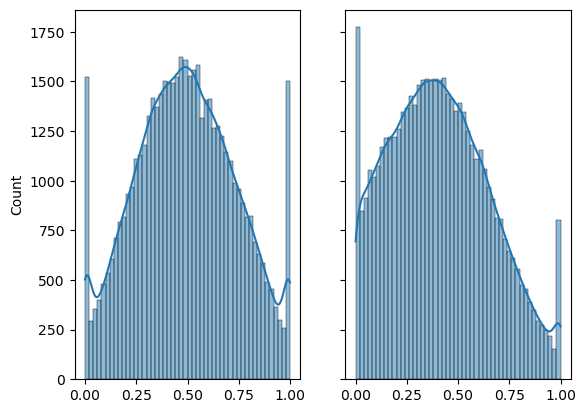

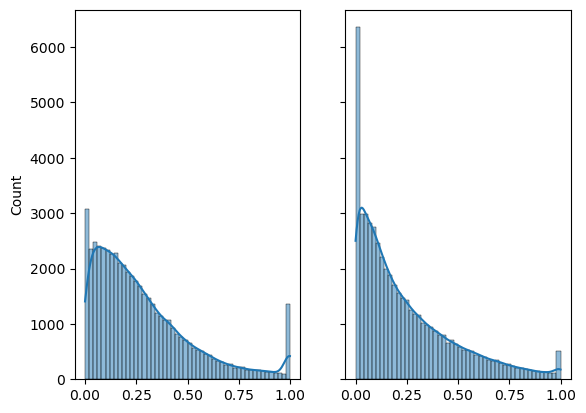

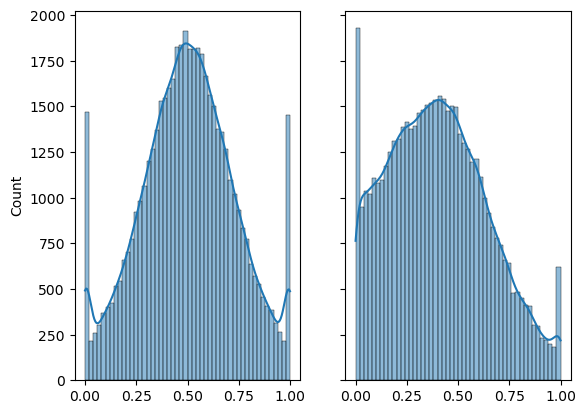

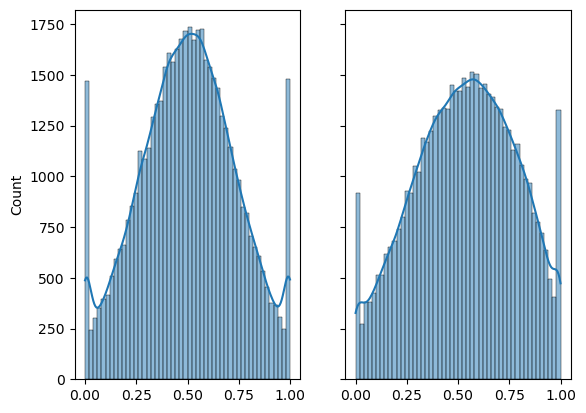

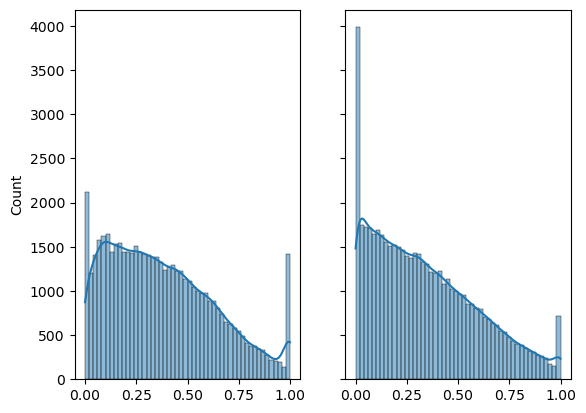

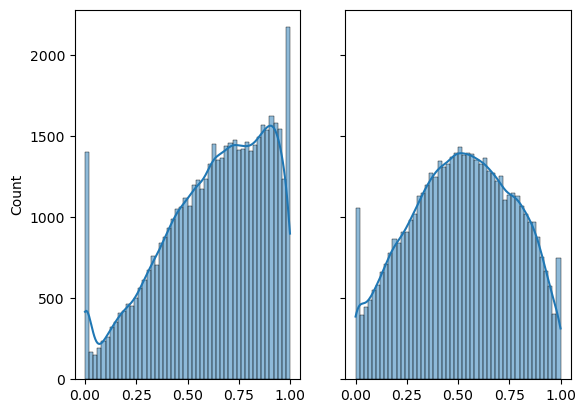

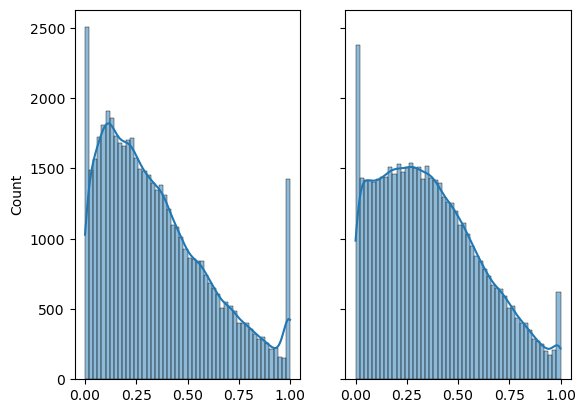

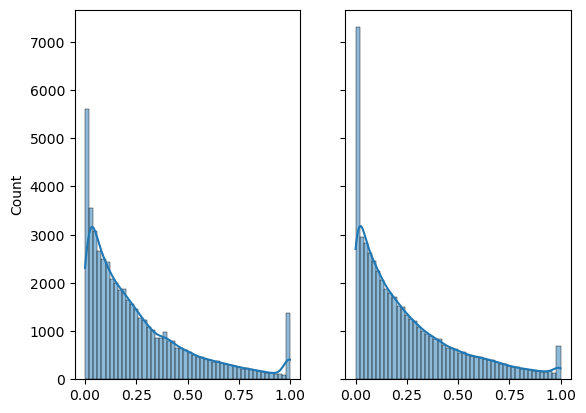

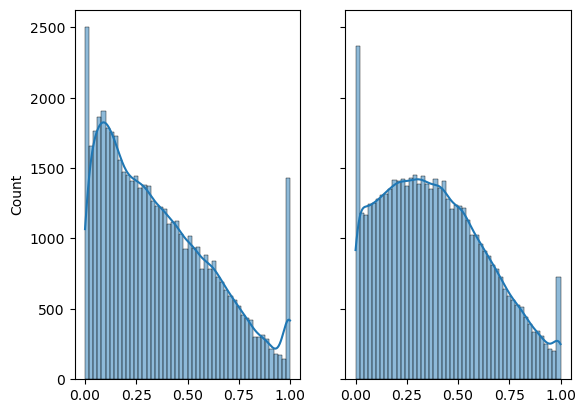

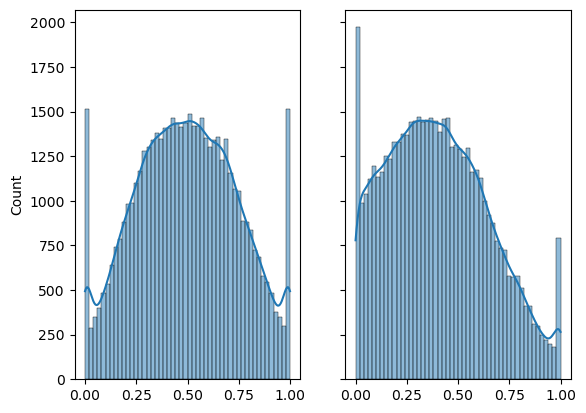

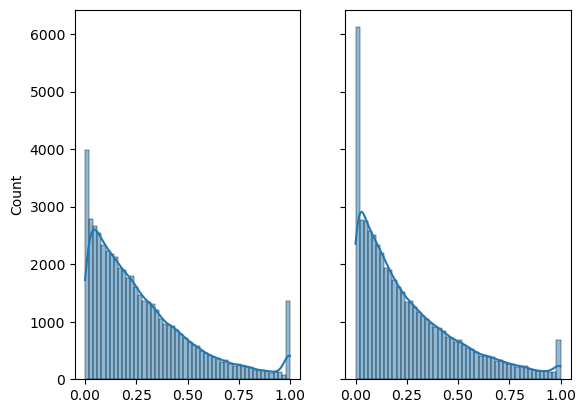

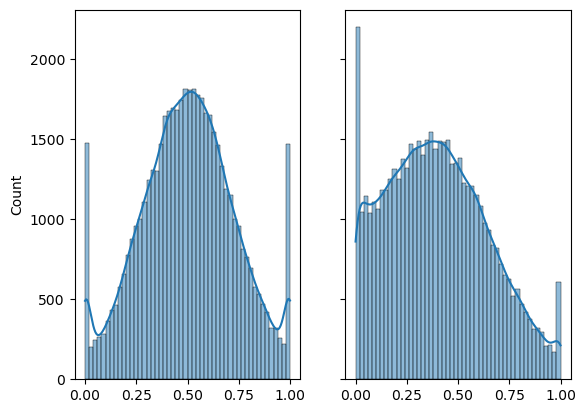

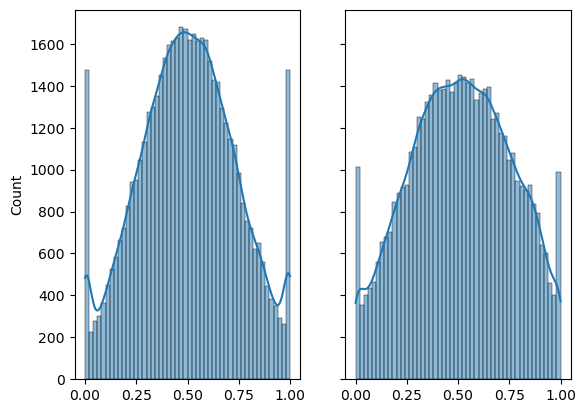

In [92]:
for i in range(20):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    sns.histplot(list_of_features[i].flatten(), kde=True, bins=50, ax=ax1)
    sns.histplot(list_of_features_fake_train_1d[i].flatten(), kde=True, bins=50, ax=ax2)